In [1]:
#!pip install praw

# Importing PRAW: Accessing Reddit Data

In [2]:
import praw  #Importing PRAW Module

# Setting Up Reddit API Credentials

In [3]:
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" # Setting up user agent for Reddit API request
# Creating Reddit instance with provided credentials
reddit = praw.Reddit(
    client_id="QWm1pNTk8JgJg4mRf4r6HQ",  # Inserting client ID
    client_secret="mNrJ5qUOl5vI9pIsuPX-dTzB4dDjNA", # Inserting client secret
    user_agent=user_agent
)

# Importing Pandas, NumPy, and Regex Modules

In [4]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

# Retrieving Latest Topics from Subreddit

In [5]:
# Hot new rising topics

headlines = set()
# Iterating through submissions in the hot section of the Tollywood subreddit
for submission in reddit.subreddit("India").hot(limit=None):
    print(submission.title)  #Subreddit Title
    print(submission.id)     #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

The fortnightly Ask India Thread
186q2eq
AutoModerator
1701266490.0
74
0.98
https://www.reddit.com/r/india/comments/186q2eq/the_fortnightly_ask_india_thread/
0


# Counting Unique Headlines from Hot Posts in India Subreddit

In [6]:
headlines = set()
for submission in reddit.subreddit("India").hot(limit=None): # Retreving the tittle of hot posts in Tollywood subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

280


# Creating DataFrame from Scraped Reddit Data

In [7]:
#Create a dataframe from the scrapped data 
India_df = pd.DataFrame(headlines)

# Displaying Top Five Rows of the India DataFrame

In [8]:
India_df.head() # Printing the Top Five Rows

,0
0,Final Year Student - Resume Review and Upskill...
1,'Nothing short of a nightmare': JP Morgan VP s...
2,Left with few choices? Rivals since India’s 1s...
3,"Learnt from Israel, Indian forces deploy drone..."
4,Sandeshkhali: Fact-finding team briefly arrest...


# Displaying Column Names of the India DataFrame

In [9]:
India_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

# Assigning Column Names to the India DataFrame

In [10]:
India_df.columns = ['Titles'] # Adding Column Names

# Displaying Top Five Rows of the India DataFrame with Column Names

In [11]:
India_df.head() # Printing top Five Rows

,Titles
0,Final Year Student - Resume Review and Upskill...
1,'Nothing short of a nightmare': JP Morgan VP s...
2,Left with few choices? Rivals since India’s 1s...
3,"Learnt from Israel, Indian forces deploy drone..."
4,Sandeshkhali: Fact-finding team briefly arrest...


# Counting Duplicate Titles in the India DataFrame

In [12]:
India_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

# Text Cleaning: Removing Mentions, Hashtags, RT, Hyperlinks, and Special Characters

In [13]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
India_df["Titles"]= India_df["Titles"].apply(cleanTxt)

#Show the clean text
India_df.head()

,Titles
0,Final Year Student - Resume Review and Upskill...
1,'Nothing short of a nightmare' JP Morgan VP sp...
2,Left with few choices? Rivals since India’s 1s...
3,"Learnt from Israel, Indian forces deploy drone..."
4,Sandeshkhali Fact-finding team briefly arreste...


# Removing Emojis and Unicode Characters from Text

In [14]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
India_df["Titles"]= India_df["Titles"].apply(remove_emoji)

#Show the clean text
India_df.head()

,Titles
0,Final Year Student - Resume Review and Upskill...
1,'Nothing short of a nightmare' JP Morgan VP sp...
2,Left with few choices? Rivals since India’s 1s...
3,"Learnt from Israel, Indian forces deploy drone..."
4,Sandeshkhali Fact-finding team briefly arreste...


In [15]:
#!pip install textblob

# Importing TextBlob and WordCloud Libraries

In [16]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

# Sentiment Analysis

In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
India_df['Subjectivity'] = India_df['Titles'].apply(getSubjectivity)
India_df['Polarity'] = India_df['Titles'].apply(getPolarity)

#Now display data
India_df.head()

,Titles,Subjectivity,Polarity
0,Final Year Student - Resume Review and Upskill...,1.000000,0.0
1,'Nothing short of a nightmare' JP Morgan VP sp...,0.300000,0.0
2,Left with few choices? Rivals since India’s 1s...,0.050000,-0.1
3,"Learnt from Israel, Indian forces deploy drone...",0.000000,0.0
4,Sandeshkhali Fact-finding team briefly arreste...,0.333333,0.0


# Categorizing Polarity Scores into Insights: Negative, Neutral, and Positive

In [18]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
India_df["Insight"] = India_df["Polarity"].apply(getInsight)

India_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Final Year Student - Resume Review and Upskill...,1.000000,0.000000,Neutral
1,'Nothing short of a nightmare' JP Morgan VP sp...,0.300000,0.000000,Neutral
2,Left with few choices? Rivals since India’s 1s...,0.050000,-0.100000,Negative
3,"Learnt from Israel, Indian forces deploy drone...",0.000000,0.000000,Neutral
4,Sandeshkhali Fact-finding team briefly arreste...,0.333333,0.000000,Neutral
5,Man threatens to set Ayodhya special train on ...,0.571429,0.357143,Positive
6,Scam alert media monks,0.000000,0.000000,Neutral
7,“The Island of Seductive Women” origin story o...,0.000000,0.000000,Neutral
8,BJP Karnataka Deletes Insta Reel On PM Modi Af...,0.000000,0.000000,Neutral
9,Are Farmer demands BASELESS or is the govt exp...,0.200000,0.200000,Positive


# Importing Seaborn for Data Visualization

In [19]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

# Visualization of Sentiment Scores 

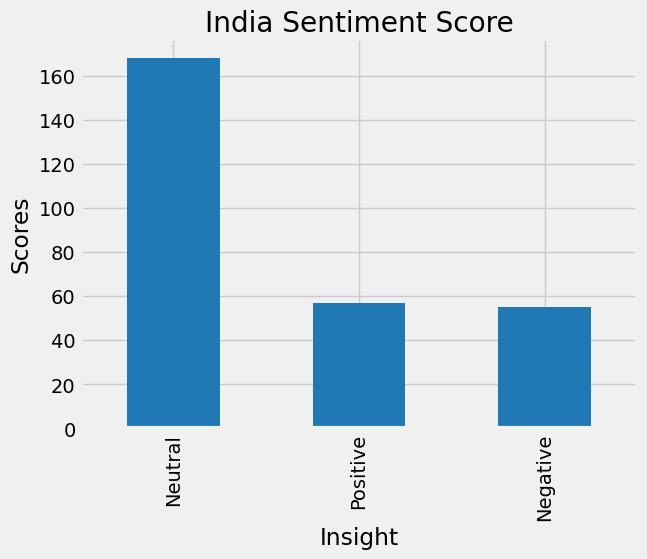

In [20]:
#Plot the values count of sentiment
plt.title("India Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (8,8) # Figure Size
India_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Word Cloud Visualization of Title Data

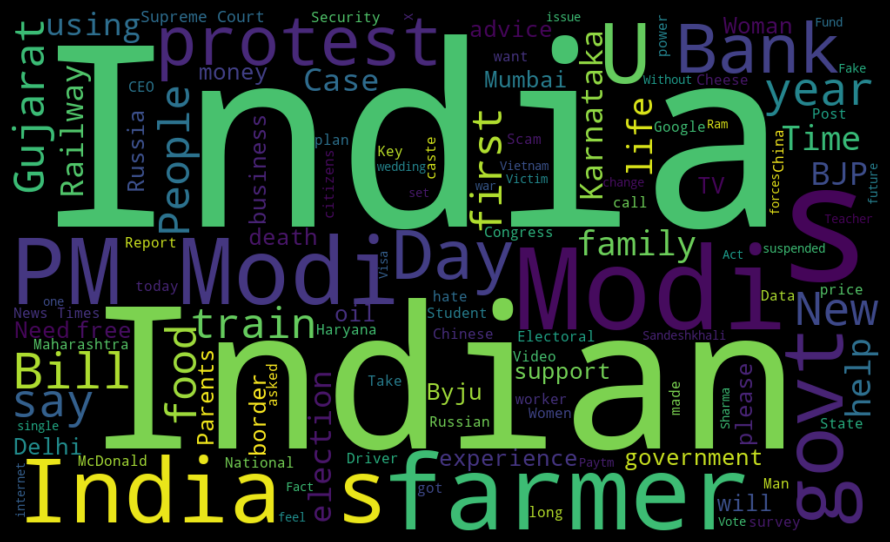

In [21]:
text = ' '.join( [twts for twts in India_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");